## Real Estate price predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv("houseprice.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288547,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704628,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B2105F3C8>,
      dtype=object)

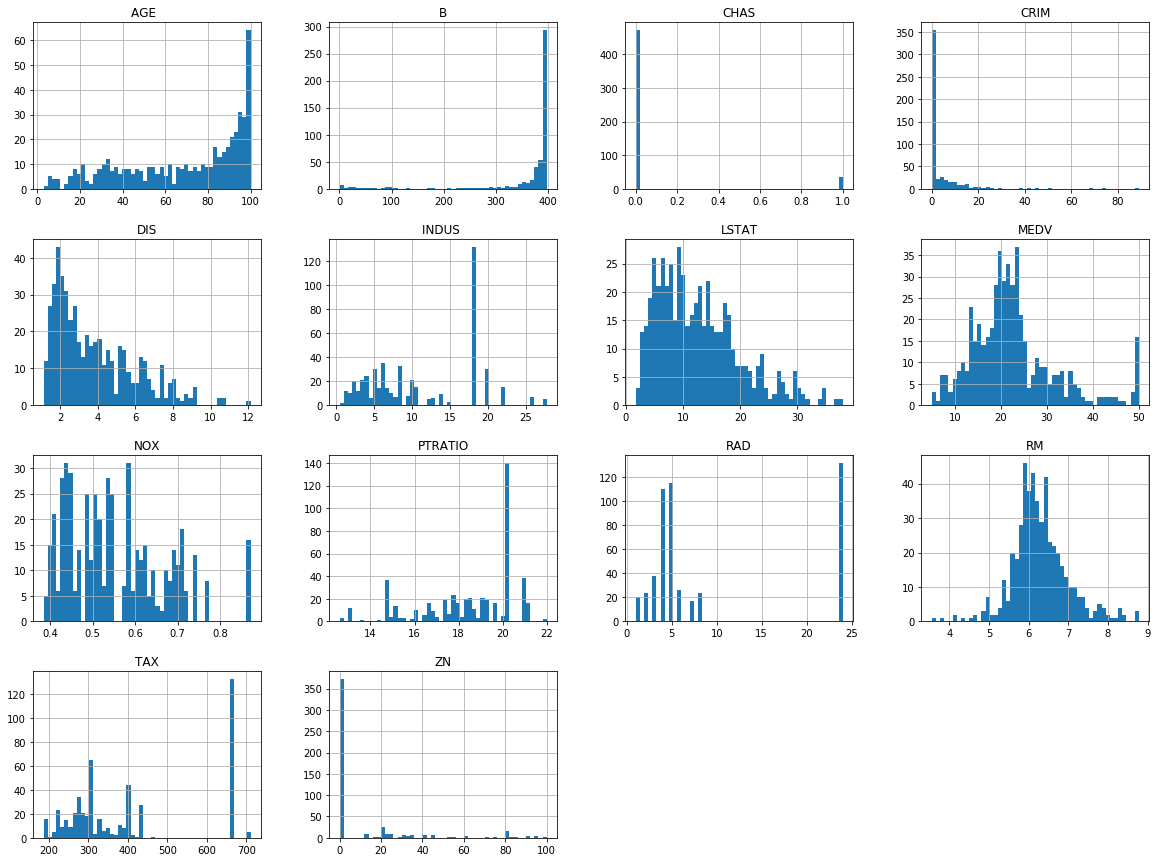

In [7]:
housing.hist(bins=50, figsize = (20,15))

## Train-Test Splitting

In [8]:
#Learn how train and test works(the function to split data set is already available in sklearn)
def split_train_test(data,test_ratio):
    np.random.seed(42) #this helps to fix the randomness
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
#train_set, test_set = split_train_test(housing, 0.2)

In [10]:
#print(f"Rows in train set: {len(train_set)} \nRows in Test set:{len(test_set)}")

In [11]:
train_set, test_set = train_test_split(housing,test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)} \nRows in Test set:{len(test_set)}")

Rows in train set: 404 
Rows in Test set:102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
#for huge data frames/ Realtime program do this
#this dataset is already small hence we would not do it for this dataframe
housing = strat_train_set.copy()

## Looking for Correlation

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix['MEDV'].sort_values(ascending=False)
#see the output
#MEDV has strong positive correlation
#RM has high positive correlation while all others have low positive correlation
#LSTAT has low negative correlation

MEDV       1.000000
RM         0.681212
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B22B44CC8>,
      dtype=object)

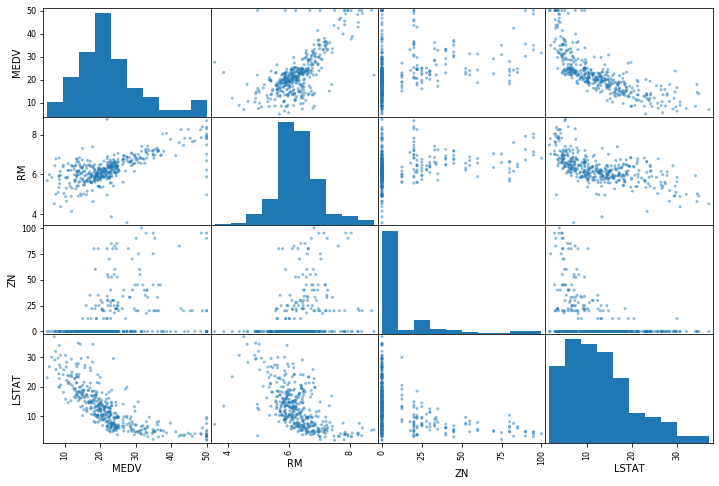

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"] #considering only the important features
scatter_matrix(housing[attributes], figsize=(12,8))

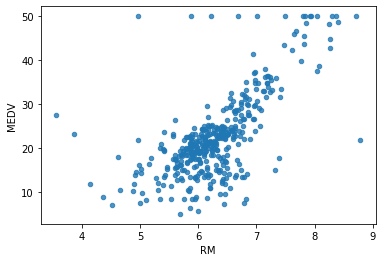

In [17]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations

In [18]:
housing["TAXRM"] = housing['TAX']/housing['RM'] #adding new column to the pandas data set

In [19]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [20]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
#see the output
#TAXRM has next highest negative correlation, hence we have successfully established a new feature for our model
#from this you understand how to establish new features to build a good model
#if the new feature you establish has a low +ve/-ve correlation then that feature is of no use

MEDV       1.000000
RM         0.681212
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525683
LSTAT     -0.740494
Name: MEDV, dtype: float64

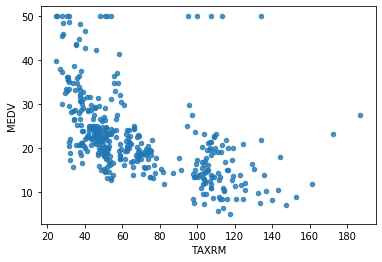

In [21]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [22]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attribute

There are three ways to treat attribute containing missing data

   1.Get rid of the missing data point
   
   2.Get rid of the whole attribute
   
   3.Set the value to some value(0, mean or median)

In [23]:
#option 1
a = housing.dropna(subset=['RM']).shape
a
#Note that original housing dataframe will remain unchanged, a is just a copy of modified housing

(399, 13)

In [24]:
#option 2
housing.drop("RM", axis=1).shape
#Note that original housing dataframe will remain unchanged, Pandas never modified the original dataframe unless explicitely mentioned

(404, 12)

In [25]:
#option 3
median = housing['RM'].median()
housing['RM'].fillna(median)
#Note that original housing dataframe will remain unchanged, Pandas never modified the original dataframe unless explicitely mentioned

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [26]:
housing.shape

(404, 13)

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [29]:
X = imputer.transform(housing)

In [30]:
housing_tr = pd.DataFrame(X, columns= housing.columns)

In [31]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283948,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711214,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit_learn Design

Primarily, three types of objects:
    1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters.

    2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.
    
    3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Featuren Scaling

Primarily, two types of feature scaling methods:
    1. Min-max scaling (Normalization)
       (value - min)/(max - min)
       Sklearn provides a class called MinMaxScaler for this
    2. Standardization
       (value - mean)/std
       Sklearn provides a class called StandardScaler for this

## Creating pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing) #Since we apply imputer above we can use housing but you can also directly use housing_tr

In [34]:
housing_num_tr.shape

(404, 13)

## Selecting a desire model 

In [35]:
from sklearn.linear_model import LinearRegression 
#model = LinearRegression()
from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([22.506, 25.833, 16.615, 23.361, 23.519])

In [38]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [40]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [41]:
rmse

1.2320664230438547

## Using better evaluation technique - Cross validation

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [43]:
rmse_scores

array([3.00635411, 2.80929281, 4.34695859, 2.57370414, 3.68268143,
       2.68239884, 4.58013878, 3.33783589, 2.92341565, 3.10855346])

In [46]:
def print_scores(scores):
    print("SCores:",scores)
    print("Mean:", scores.mean())
    print("Standard deviation:",scores.std())

In [47]:
print_scores(rmse_scores)

SCores: [3.00635411 2.80929281 4.34695859 2.57370414 3.68268143 2.68239884
 4.58013878 3.33783589 2.92341565 3.10855346]
Mean: 3.305133369525417
Standard deviation: 0.6555087008619033


## Saving the model

In [49]:
from joblib import dump, load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [50]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_pred = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print(final_pred, list(Y_test))

[25.156 11.486 25.27  22.358 18.479 14.765 19.727 14.486 31.681 42.755
 19.757 11.385 23.847 27.066 19.402 11.027 31.034 14.554 23.594 18.905
 20.213 17.251 16.873 21.465 18.631 31.245 15.874 32.618  9.147 32.968
 23.476 21.464 22.929 10.866 21.162 11.066 43.105 24.159 23.609 42.219
 24.072 29.729 20.715 20.444 18.038 33.063 44.011 19.93  20.669 21.515
 21.362 14.601 21.287 15.118 25.216 33.055 41.81  29.428 19.791 20.414
 47.042  9.765 18.597 25.121 14.637 32.972 19.894 17.871 18.885 34.351
 25.942 22.986 20.915 22.743 34.746 12.335 15.836 20.044 20.324 21.237
 22.627 20.682 14.058 22.61  20.428 21.587 14.129 20.628 21.817 23.601
 18.829 27.541  7.518 26.289 19.697 29.377 20.539 30.293 14.354 26.535
 21.268 20.692] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [51]:
final_rmse

2.9213704815028287

In [53]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24769779, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [54]:
from joblib import dump,load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24769779, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.506])